# TP1 - Parte A: Classificação de Atividades Humanas
### Tópicos de Ciência dos Dados - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995


In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy import stats, spatial
from scipy.signal import periodogram, welch

In [2]:
columns_labels = [ 'Device ID', 'accelerometer x', 'accelerometer y', 'accelerometer z',
    'gyroscope x', 'gyroscope y', 'gyroscope z', 'magnetometer x', 'magnetometer y', 'magnetometer z',
    'Timestamp', 'Activity Label']

activities = np.array(['Stand', 'Sit', 'Sit and Talk', 'Walk', 'Walk and Talk', 'Climb Stair (up/down)',
    'Climb Stair (up/down) and talk', 'Stand -> Sit', 'Sit -> Stand', 'Stand -> Sit and talk', 'Sit -> Stand and talk',
    'Stand -> walk', 'Walk -> stand', 'Stand -> climb stairs (up/down)(and talk)', 'Climb stairs (up/down) -> walk',
    'Climb stairs (up/down) and talk -> walk and talk'])

sensors = ['Acc', 'Gyr', 'Mag']

k_value = [3, 3.5, 4]

### 2. Read Files
Read files 

-> Dispositivo do pulso direito (Dev2) 

-> Leitura do pulso direito de todos os utilizadores

In [3]:
def readFiles(devi):
    dev = [0]*15
    for id in range(15):
        file = "part" + str(id)
        pasta = "dataset\part" + str(id)

        f = file + "dev" + str(devi) + ".csv"
        dir = os.path.join(pasta, f)
        dev[id] = np.genfromtxt(dir, delimiter=',')

    dFrame = pd.DataFrame(np.concatenate(dev), columns=columns_labels)
    labels = activities[dFrame['Activity Label'].astype(int)-1]
    dFrame['Label Name'] = labels
    display(dFrame)

    return [np.concatenate(dev), dFrame]

[data, dataFrame] = readFiles(2)

,Device ID,accelerometer x,accelerometer y,accelerometer z,gyroscope x,gyroscope y,gyroscope z,magnetometer x,magnetometer y,magnetometer z,Timestamp,Activity Label,Label Name
0,2.0,3.0317,9.0450,3.1739,0.76247,3.7071,-0.31384,0.57764,0.68849,1.2654,63.629,1.0,Stand
1,2.0,2.9591,9.0436,3.1400,0.40588,4.6682,-0.10148,0.58385,0.68849,1.2741,83.160,1.0,Stand
2,2.0,2.9465,9.0545,3.0799,0.24230,5.5225,0.34857,0.56522,0.67857,1.2675,102.690,1.0,Stand
3,2.0,2.7898,9.0528,3.0726,0.49858,6.3463,0.61127,0.56108,0.65476,1.2610,122.220,1.0,Stand
4,2.0,2.6924,9.0377,2.9794,0.63197,6.6972,1.00560,0.57764,0.69246,1.2675,141.750,1.0,Stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
781817,2.0,1.6802,9.5395,2.9636,0.83324,1.9832,0.87140,-0.38716,0.87103,1.3289,1042000.000,1.0,Stand
781818,2.0,1.7042,9.5639,2.9504,1.03060,1.8002,0.54192,-0.37474,0.86508,1.3399,1042000.000,1.0,Stand
781819,2.0,1.7283,9.5641,2.9496,1.05330,1.3577,0.89447,-0.35818,0.92857,1.3531,1042000.000,1.0,Stand
781820,2.0,1.7285,9.5646,2.9737,1.03550,1.4340,0.78856,-0.36232,0.90675,1.3377,1042000.000,1.0,Stand


### 3. Módulo

-> Módulo do aceleração, giroscópio, magnenómetro

-> Cálculo feito por linha da tabela

In [4]:
def modulo(dFrame):

    for i in range(16):
        acc = np.sqrt(dFrame['accelerometer x']**2 + dFrame['accelerometer y']**2 + dFrame['accelerometer z']**2)
        gir = np.sqrt(dFrame['gyroscope x']**2 + dFrame['gyroscope y']**2 + dFrame['gyroscope z']**2)
        mag = np.sqrt(dFrame['magnetometer x']**2 + dFrame['magnetometer y']**2 + dFrame['magnetometer z']**2)

    data = pd.DataFrame({'ID': dFrame['Device ID'], 'Acc': acc, 'Gyr': gir, 'Mag': mag, 
                            'Label ID': dFrame['Activity Label'].astype(int), 'Label Name': dFrame['Label Name']})

    return data

mod_data = modulo(dataFrame)
display(mod_data)

,ID,Acc,Gyr,Mag,Label ID,Label Name
0,2.0,10.053699,3.797690,1.552071,1,Stand
1,2.0,10.020108,4.686910,1.561483,1,Stand
2,2.0,10.007578,5.538792,1.544826,1,Stand
3,2.0,9.958767,6.395135,1.527626,1,Stand
4,2.0,9.889685,6.801699,1.555547,1,Stand
...,...,...,...,...,...,...
781817,2.0,10.129564,2.320928,1.635409,1,Stand
781818,2.0,10.152701,2.143953,1.638330,1,Stand
781819,2.0,10.156730,1.937232,1.679707,1,Stand
781820,2.0,10.164260,1.936606,1.656174,1,Stand


### 3.1. Boxplot dos módulos

-> Boxplot de cada módulo agrupado por atividade (Label ID)

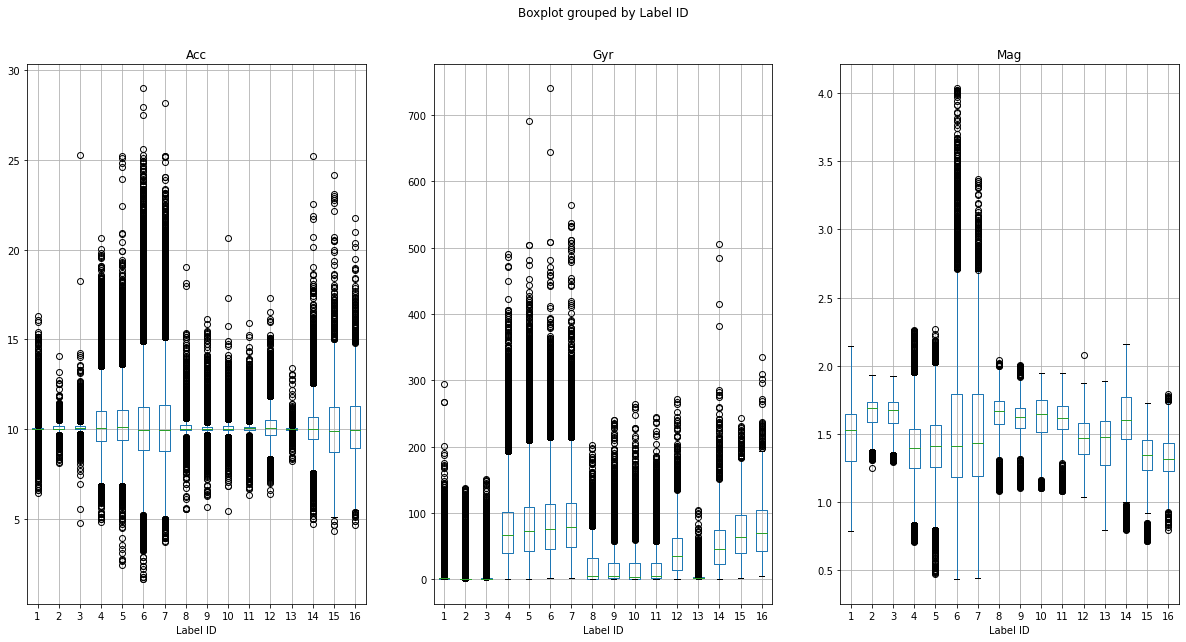

In [10]:
def boxplot(mod_data):
    fig, axes = plt.subplots(1,3, figsize=(20,10))

    mod_data.boxplot(by ='Label ID', column = ['Acc'], ax=axes.flatten()[0])
    mod_data.boxplot(by ='Label ID', column = ['Gyr'], ax=axes.flatten()[1])
    mod_data.boxplot(by ='Label ID', column = ['Mag'], ax=axes.flatten()[2])

    fig.savefig('images/boxplot')

boxplot(mod_data)

### 3.2. Densidade

[Q1 − k × IQR,Q3 + k × IQR] -> Not outlier

d = (n0 / nr) * 100

In [7]:
def outliers(data_act, sensor):
    k = 1.5
    quantil = data_act[sensor].quantile([0.25,0.75])
    iqr = quantil[0.75] - quantil[0.25]
    limite = [quantil[0.25] - k*iqr, quantil[0.75] + k*iqr]

    out = data_act.loc[(data_act[sensor] < limite[0]) | (data_act[sensor] > limite[1])] 
    not_out = data_act.loc[(data_act[sensor] >= limite[0]) & (data_act[sensor] <= limite[1])]

    return [out, not_out]


def density(mod_data):
    den = [pd.DataFrame(np.arange(1,17)), pd.DataFrame(activities)]
    den[0].columns = ['Label']
    den[1].columns = ['Label Name']

    for s in sensors:
        aux = [[],[],[]]
        for id in range(1,17):
            activity = mod_data.loc[mod_data["Label ID"] == id]
            n_total = activity.shape[0]
            [out, not_out] = outliers(activity, s)

            d = (out.shape[0]/n_total)*100

            aux[0].append(n_total) # Número de total de pontos
            aux[1].append(out.shape[0]) # Número de outliers
            aux[2].append(d) # Densidade

        aux[0] = pd.DataFrame(aux[0])
        aux[0].columns = [s + ' N_Total']
        aux[1] = pd.DataFrame(aux[1])
        aux[1].columns = [s + ' N_Outliers']
        aux[2] = pd.DataFrame(aux[2])
        aux[2].columns= [s + ' Density']

        aux = pd.concat(aux, axis=1)

        den.append(aux)


    den = pd.concat(den, axis=1)
    den.index = np.arange(1,17)
    
    return den
        

den = density(mod_data)
display(den)


,Label,Label Name,Acc N_Total,Acc N_Outliers,Acc Density,Gyr N_Total,Gyr N_Outliers,Gyr Density,Mag N_Total,Mag N_Outliers,Mag Density
1,1,Stand,157882,6624,4.195538,157882,14975,9.484932,157882,0,0.000000
2,2,Sit,83968,181,0.215558,83968,5581,6.646580,83968,5603,6.672780
3,3,Sit and Talk,81152,417,0.513851,81152,7399,9.117459,81152,3868,4.766364
4,4,Walk,139934,4941,3.530950,139934,2268,1.620764,139934,2030,1.450684
5,5,Walk and Talk,142366,4951,3.477656,142366,2033,1.428009,142366,1906,1.338803
6,6,Climb Stair (up/down),89359,4616,5.165680,89359,1339,1.498450,89359,349,0.390559
7,7,Climb Stair (up/down) and talk,43791,1977,4.514626,43791,908,2.073485,43791,97,0.221507
8,8,Stand -> Sit,6656,1028,15.444712,6656,497,7.466947,6656,232,3.485577
9,9,Sit -> Stand,5632,1115,19.797585,5632,607,10.777699,5632,414,7.350852
10,10,Stand -> Sit and talk,6656,1020,15.324519,6656,688,10.336538,6656,56,0.841346


### 3.3. Análise da densidade dos outliers
Pela visualização dos resultados acima, percebemos que a densidade de outliers no acelerómetro e no giroscópio aumenta quando a atividade se trata de uma mudança de ação. <br>
Tal como era espectável, a densidade de outliers da atividade "sit" no acelerómetro é residual, uma vez que não existe qualquer aceleração quando o utilizador está sentado. Esse valor aumenta um pouco quando o utilizador fala mas, mesmo assim, continua a ser um valor muito baixo, precisamente pela mesma razão.

### 3.4. Z-Score

z = (X - media) / std

|z| < k -> z <= k & z >= -k

,Label,Label Name,Acc N_Total,Acc N_Outliers,3.0,3.5,4.0
1,1,Stand,157882,6624,1328,1123,977
2,2,Sit,83968,181,199,173,155
3,3,Sit and Talk,81152,417,295,245,216
4,4,Walk,139934,4941,1497,681,283
5,5,Walk and Talk,142366,4951,1522,720,302
6,6,Climb Stair (up/down),89359,4616,1163,573,288
7,7,Climb Stair (up/down) and talk,43791,1977,595,292,152
8,8,Stand -> Sit,6656,1028,122,91,76
9,9,Sit -> Stand,5632,1115,143,106,77
10,10,Stand -> Sit and talk,6656,1020,148,99,68


,Label,Label Name,Gyr N_Total,Gyr N_Outliers,3.0,3.5,4.0
1,1,Stand,157882,14975,2348,2003,1744
2,2,Sit,83968,5581,392,356,323
3,3,Sit and Talk,81152,7399,518,459,413
4,4,Walk,139934,2268,1274,700,421
5,5,Walk and Talk,142366,2033,1235,691,395
6,6,Climb Stair (up/down),89359,1339,810,426,201
7,7,Climb Stair (up/down) and talk,43791,908,480,266,161
8,8,Stand -> Sit,6656,497,122,56,27
9,9,Sit -> Stand,5632,607,123,84,60
10,10,Stand -> Sit and talk,6656,688,141,81,50


,Label,Label Name,Mag N_Total,Mag N_Outliers,3.0,3.5,4.0
1,1,Stand,157882,0,0,0,0
2,2,Sit,83968,5603,1,1,0
3,3,Sit and Talk,81152,3868,0,0,0
4,4,Walk,139934,2030,116,41,3
5,5,Walk and Talk,142366,1906,92,28,0
6,6,Climb Stair (up/down),89359,349,441,322,200
7,7,Climb Stair (up/down) and talk,43791,97,160,89,42
8,8,Stand -> Sit,6656,232,168,16,0
9,9,Sit -> Stand,5632,414,10,0,0
10,10,Stand -> Sit and talk,6656,56,25,0,0


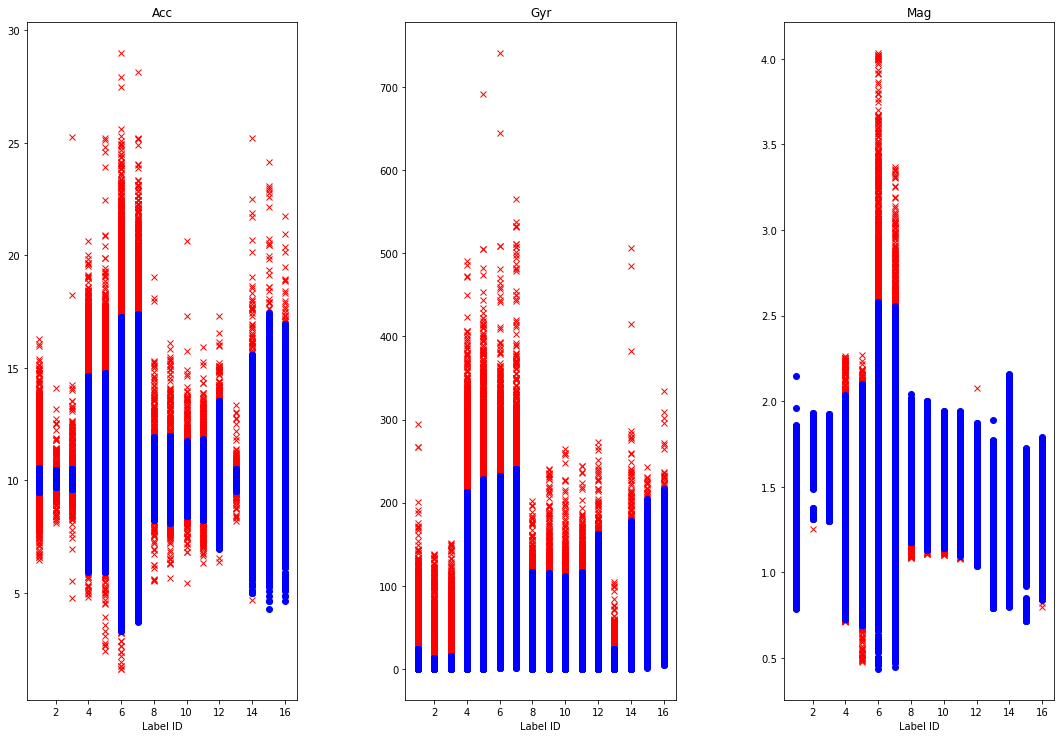

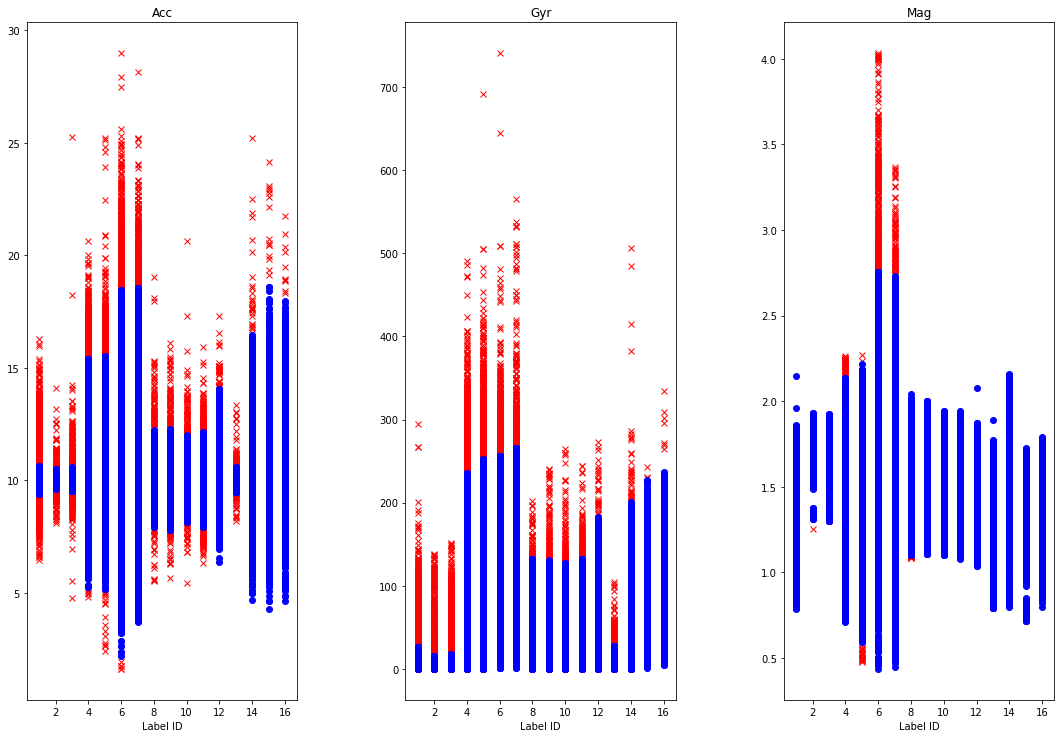

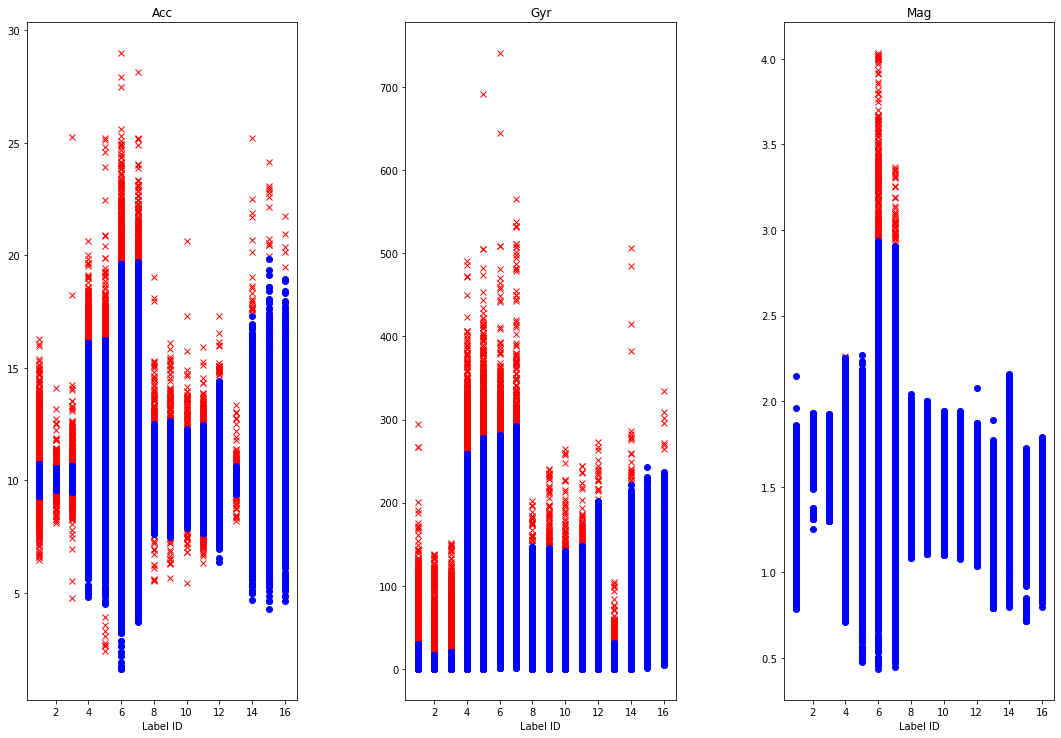

In [9]:
def z_score(activity, k):
    m = activity.mean()
    s = activity.std()
    z = (activity - m) / s

    out = activity.loc[(z < -k) | (z > k)]
    not_out = activity.loc[(z >= -k) & (z <= k)]

    return [out, not_out]

def plotZscore(data, k):
    fig, axes = plt.subplots(1,3, figsize=(15,10))
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    data.set_index('Label ID', inplace=True)
    aux=1
    for sensor in sensors:
        plt.subplot(1,3,aux)
        plt.title(sensor)
        group = data.groupby('Label ID')[sensor]
        for key, gp in group:
            [out, not_out] = z_score(gp, k)
            out.plot(legend=False, marker = 'x', color = 'red', linestyle = 'None')
            not_out.plot(legend=False, marker = 'o', color = 'blue', linestyle = 'None')
        aux +=1
    if k == 3.5:
        name = 'images/boxplot_k' + '3_5'
    else: name = 'images/boxplot_k' + str(k)
    fig.savefig(name)
    
        
def zscore(mod_data, den, sensor):
    columns = ['Label Name'] + [sensor + ' density -> k = ' + str(i) for i in k_value]
    density_to_compare = pd.DataFrame(columns = columns, index = np.arange(1,17))
    density_to_compare["Label Name"] = activities

    n_outliers = []
    for id in range(1,17):
        aux = []
        
        activity = mod_data.loc[mod_data["Label ID"] == id, sensor]
        for k in k_value:
            [out, not_out] = z_score(activity, k)

            n_total = activity.shape[0]
            d = (out.shape[0]/n_total)*100

            density_to_compare[sensor + ' density -> k = ' + str(k)][id] =  d

            aux.append(out.shape[0])
            
        aux = pd.DataFrame(aux)
        aux.columns = [id]
        aux.index = k_value

        n_outliers.append(aux)

    n_outliers = pd.concat(n_outliers, axis=1)
    n_outliers = n_outliers.transpose()

    data_zscore = pd.concat([den[['Label', 'Label Name', sensor + ' N_Total', sensor + ' N_Outliers']], n_outliers], axis=1)

    display(data_zscore)

    return density_to_compare


mod_data = modulo(dataFrame)
density_acc = zscore(mod_data, den, 'Acc')
density_gyr = zscore(mod_data, den, 'Gyr')
density_mag = zscore(mod_data, den, 'Mag')

mod_data = modulo(dataFrame)
plotZscore(mod_data, 3)
mod_data = modulo(dataFrame)
plotZscore(mod_data, 3.5)
mod_data = modulo(dataFrame)
plotZscore(mod_data, 4)



### 3.5. Comparação dos resultados de 3.1. e 3.4.
Comparando os plots da alínea anterior com os resultados no 3.1., fica evidente que existe uma clara semelhança entre eles. Sendo que os boxplots têm assinalado a azul os outliers, conseguimos encontrar uma certa sobreposição com as regiões vermelhas presentes nos gráficos da alínea 3.4., visto representarem ambos os outliers em cada atividade. Seria espectável que a sobreposição não fosse perfeita uma vez que o k utilizado no z-score varia. Quanto mais elevado o k, menos outliers existem e maior a área a azul nos plots da alínea 3.4.

### 3.6. K-means

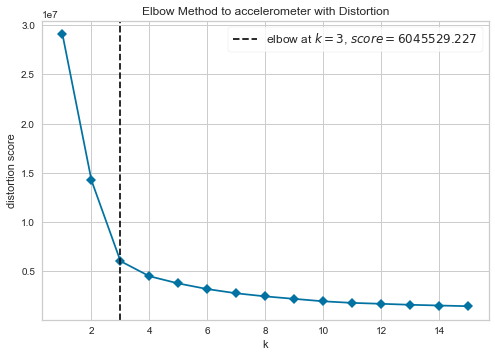

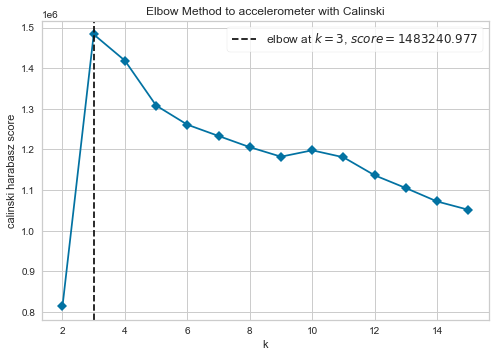

<Figure size 576x396 with 0 Axes>

In [11]:
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

def elbow_method(data, maxK, sensor):

    
    graph = KElbowVisualizer(KMeans(), k=(1,maxK), metric='distortion', timings=False, locate_elbow=True, title='Elbow Method to ' + sensor + ' with Distortion')
    graph.fit(data[[sensor + ' x', sensor + ' y', sensor + ' z']].to_numpy())       
    graph.show()

    graph = KElbowVisualizer(KMeans(), k=(2,maxK), metric='calinski_harabasz', timings=False, locate_elbow=True, title='Elbow Method to ' + sensor + ' with Calinski')
    graph.fit(data[[sensor + ' x', sensor + ' y', sensor + ' z']].to_numpy())       
    graph.show()

maxK = 16
elbow_method(dataFrame, maxK, 'accelerometer')

In [226]:
def updateCentroids(data, clusters, centroids, n_cluster, sensor):
    for i in range(n_cluster):
        centroids[0][i] = (data.iloc[clusters[i].index][sensor + ' x']).mean()
        centroids[1][i] = (data.iloc[clusters[i].index][sensor + ' y']).mean()
        centroids[2][i] = (data.iloc[clusters[i].index][sensor + ' z']).mean()

    return centroids

def make_clusters(newData, clusters, n_cluster):

    lista = [i for i in range(n_cluster)]

    newData['Cluster'] = newData[lista].idxmin(axis=1)

    for i in range(n_cluster):
        clusters[i] = (newData[newData['Cluster'] == i])
        clusters[i] = clusters[i][i]
    
    return clusters, newData


def distances(sensorData, sensor, newData, centroids, n_cluster):
    for i in range(n_cluster):
        newData[i] = np.sqrt((pd.DataFrame(sensorData[sensor + ' x'].tolist()).subtract(centroids[0][i], axis=1) + pd.DataFrame(sensorData[sensor + ' y'].tolist()).subtract(centroids[1][i], axis=1) + pd.DataFrame(sensorData[sensor + ' z'].tolist()).subtract(centroids[2][i], axis=1)) ** 2)

    return newData


def init_centroids(data, sensor, n_cluster):
    centroids = np.zeros((n_cluster, 3),  dtype=object)

    pos = np.random.choice(data.shape[0], n_cluster, replace=False)

    for i in range(n_cluster):
        centroids[i][0] = data.iloc[pos[i]][sensor + ' x']
        centroids[i][1] = data.iloc[pos[i]][sensor + ' y']
        centroids[i][2] = data.iloc[pos[i]][sensor + ' z']

    centroids = pd.DataFrame(centroids)

    return centroids

  
def k_means(data, sensor, n_cluster, maxIt):  

    sensorData = data[[sensor + ' x', sensor + ' y', sensor + ' z']]

    centroids = init_centroids(sensorData, sensor, n_cluster)

    newData = np.zeros((sensorData.shape[0], n_cluster + 1),  dtype=object)
    newData = pd.DataFrame(newData)
    newData.columns = [*newData.columns[:-1], 'Cluster']

    clusters = [[] for i in range(n_cluster)]

    for i in range(maxIt):
        #print("---------------------" + str(i) + "-----------------------")
        newData = distances(sensorData, sensor, newData, centroids, n_cluster)
        clusters, newData = make_clusters(newData, clusters, n_cluster)
        oldCentr = centroids.copy()
        centroids = updateCentroids(data, clusters, centroids, n_cluster, sensor)
        
        if centroids.equals(oldCentr):
            break

    return clusters, centroids

maxIt = 100
n_clusters = 3
clusters_acc_3, centroids_acc_3 = k_means(dataFrame, 'accelerometer', n_clusters, maxIt)
clusters_gyr_3, centroids_gyr_3 = k_means(dataFrame, 'gyroscope', n_clusters, maxIt)
clusters_mag_3, centroids_mag_3 = k_means(dataFrame, 'magnetometer', n_clusters, maxIt)

clusters_acc_2, centroids_acc_2 = k_means(dataFrame, 'accelerometer', 2, maxIt)
clusters_gyr_2, centroids_gyr_2 = k_means(dataFrame, 'gyroscope', 2, maxIt)
clusters_mag_2, centroids_mag_2 = k_means(dataFrame, 'magnetometer', 2, maxIt)

clusters_acc_4, centroids_acc_4 = k_means(dataFrame, 'accelerometer', 4, maxIt)
clusters_gyr_4, centroids_gyr_4 = k_means(dataFrame, 'gyroscope', 4, maxIt)
clusters_mag_4, centroids_mag_4 = k_means(dataFrame, 'magnetometer', 4, maxIt)


### Comparação dos outliers provenientes do Z-score e do K-means

In [227]:
def outliers_k(clusters, n_cluster):
    outliers = []
    for i in range(n_cluster):
        if (len(clusters[i]) < 1000):
            outliers.extend(list(clusters[i].index))
        else:
            for k, v in clusters[i].items():
                if v > 10:
                    outliers.append(k)
            
    return outliers

v_clusters = [2,3,4]

def density_k_means(sensor):
    aux = []
    columns = ['Label Name'] + [sensor + ' density k_means = ' + str(i) for i in v_clusters]
    density_to_compare = pd.DataFrame(columns = columns, index = np.arange(1,17))
    density_to_compare["Label Name"] = activities

    
    for c in v_clusters:

        if(sensor == 'Acc'): clusters, centroids = k_means(dataFrame, 'accelerometer', c, maxIt)
        elif(sensor == 'Gyr'): clusters, centroids = k_means(dataFrame, 'gyroscope', c, maxIt)
        else: clusters, centroids = k_means(dataFrame, 'magnetometer', c, maxIt)

        for id in range(1,17):
            activity = mod_data.loc[mod_data["Label ID"] == id]
            n_total = activity.shape[0]

            k_means_outliers = outliers_k(clusters, c)
            out = mod_data[sensor].iloc[k_means_outliers]

            d = (out.shape[0]/n_total)*100

            density_to_compare[sensor + ' density k_means = ' + str(c)][id] =  d

    return density_to_compare


mod_data = modulo(dataFrame)
den_acc = density_k_means('Acc')
display(density_acc.join(den_acc.set_index('Label Name'), on='Label Name'))

den_gyr = density_k_means('Gyr')
display(density_gyr.join(den_gyr.set_index('Label Name'), on='Label Name'))

den_mag = density_k_means('Mag')
display(density_mag.join(den_mag.set_index('Label Name'), on='Label Name'))

,Label Name,Acc density -> k = 3,Acc density -> k = 3.5,Acc density -> k = 4,Acc density k_means = 2,Acc density k_means = 3,Acc density k_means = 4
1,Stand,0.841135,0.711291,0.618817,5.238089,8.05475,0.385098
2,Sit,0.236995,0.206031,0.184594,9.84899,15.145055,0.724085
3,Sit and Talk,0.363515,0.301903,0.266167,10.190753,15.670593,0.749211
4,Walk,1.06979,0.486658,0.202238,5.909929,9.087856,0.434491
5,Walk and Talk,1.069075,0.505739,0.212129,5.808971,8.93261,0.427068
6,Climb Stair (up/down),1.301492,0.641234,0.322295,9.254804,14.231359,0.680402
7,Climb Stair (up/down) and talk,1.358727,0.666804,0.347103,18.885159,29.040214,1.388413
8,Stand -> Sit,1.832933,1.367188,1.141827,124.248798,191.060697,9.134615
9,Sit -> Stand,2.539062,1.882102,1.367188,146.839489,225.799006,10.795455
10,Stand -> Sit and talk,2.223558,1.48738,1.021635,124.248798,191.060697,9.134615


,Label Name,Gyr density -> k = 3,Gyr density -> k = 3.5,Gyr density -> k = 4,Gyr density k_means = 2,Gyr density k_means = 3,Gyr density k_means = 4
1,Stand,1.487187,1.268669,1.104622,462.497308,452.882533,229.395371
2,Sit,0.466845,0.423971,0.38467,869.616997,851.538681,431.323838
3,Sit and Talk,0.638308,0.565605,0.508922,899.792981,881.087342,446.290911
4,Walk,0.910429,0.500236,0.300856,521.817428,510.969457,258.817728
5,Walk and Talk,0.867482,0.485369,0.277454,512.903362,502.240704,254.396415
6,Climb Stair (up/down),0.906456,0.476729,0.224935,817.153281,800.165624,405.302208
7,Climb Stair (up/down) and talk,1.096116,0.607431,0.367655,1667.465918,1632.801261,827.051221
8,Stand -> Sit,1.832933,0.841346,0.405649,10970.552885,10742.487981,5441.316106
9,Sit -> Stand,2.183949,1.491477,1.065341,12965.198864,12695.667614,6430.646307
10,Stand -> Sit and talk,2.118389,1.216947,0.751202,10970.552885,10742.487981,5441.316106


,Label Name,Mag density -> k = 3,Mag density -> k = 3.5,Mag density -> k = 4,Mag density k_means = 2,Mag density k_means = 3,Mag density k_means = 4
1,Stand,0.0,0.0,0.0,0.0,0.0,0.0
2,Sit,0.001191,0.001191,0.0,0.0,0.0,0.0
3,Sit and Talk,0.0,0.0,0.0,0.0,0.0,0.0
4,Walk,0.082896,0.0293,0.002144,0.0,0.0,0.0
5,Walk and Talk,0.064622,0.019668,0.0,0.0,0.0,0.0
6,Climb Stair (up/down),0.493515,0.360344,0.223816,0.0,0.0,0.0
7,Climb Stair (up/down) and talk,0.365372,0.203238,0.09591,0.0,0.0,0.0
8,Stand -> Sit,2.524038,0.240385,0.0,0.0,0.0,0.0
9,Sit -> Stand,0.177557,0.0,0.0,0.0,0.0,0.0
10,Stand -> Sit and talk,0.375601,0.0,0.0,0.0,0.0,0.0


Tal como era espectável, quantos mais clusters existem, menor é a densidade de outliers já que a distãncia a cada centroid diminui, pelo que o número de outliers também decresce.

### 3.7. Plot clusters with K-means

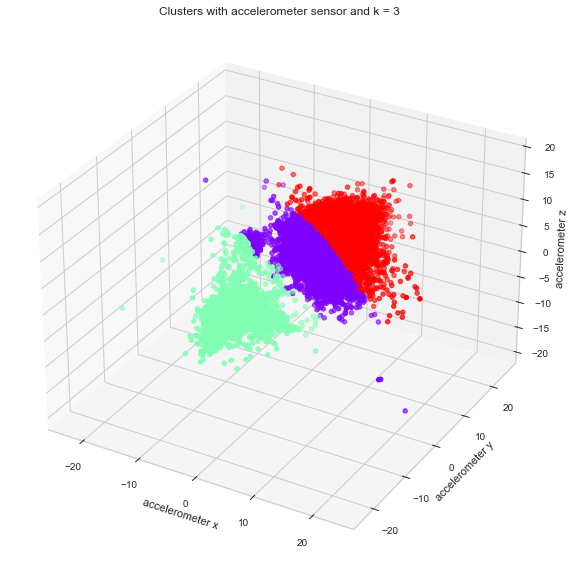

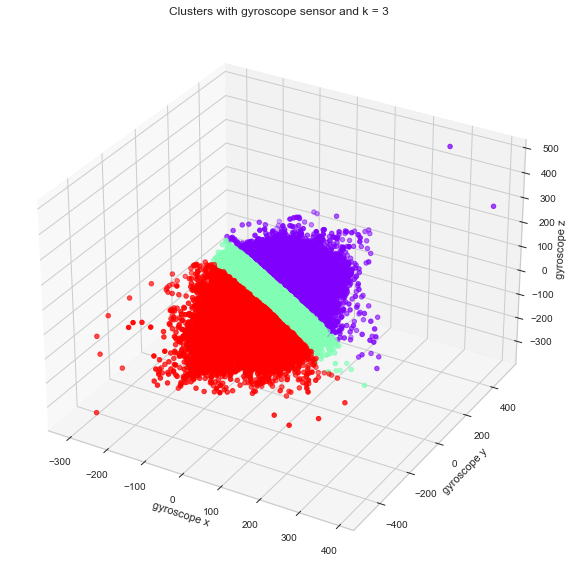

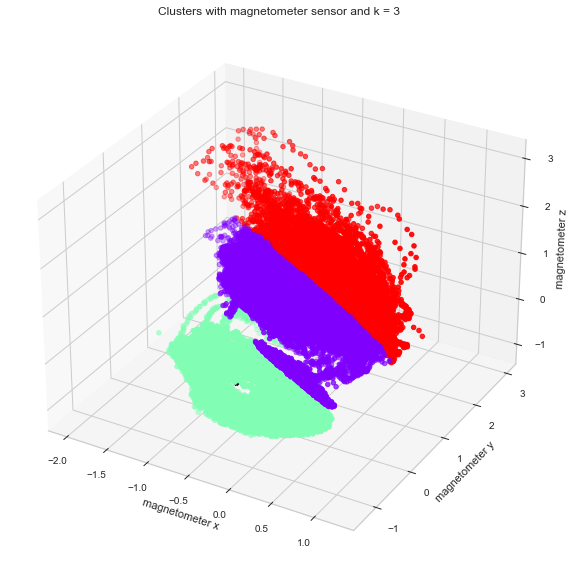

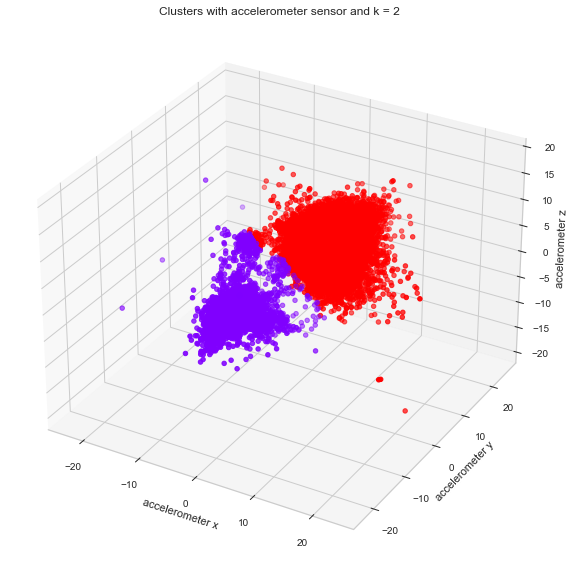

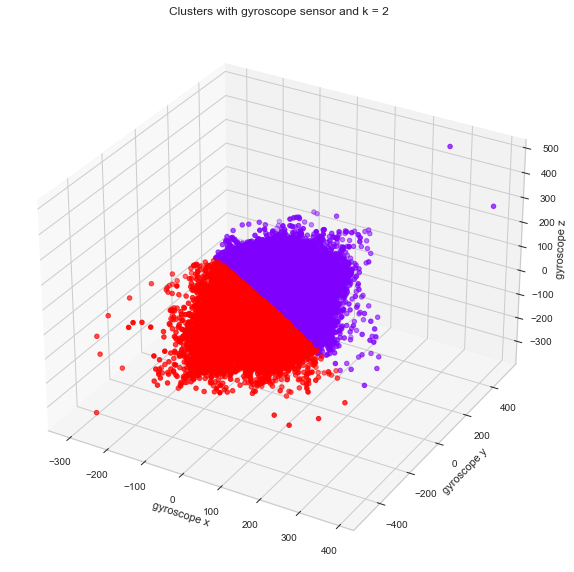

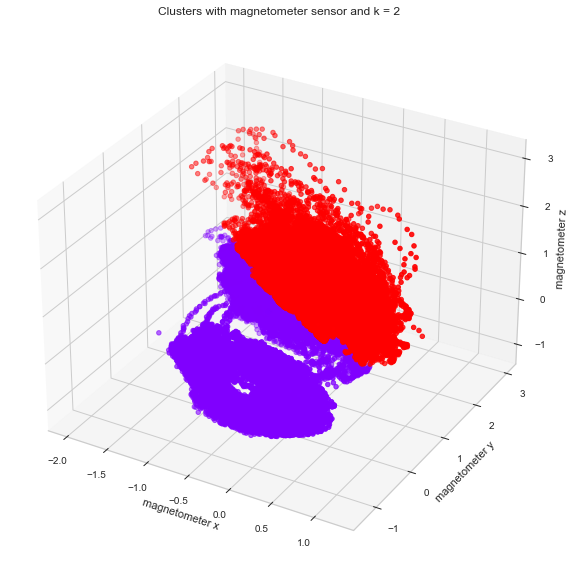

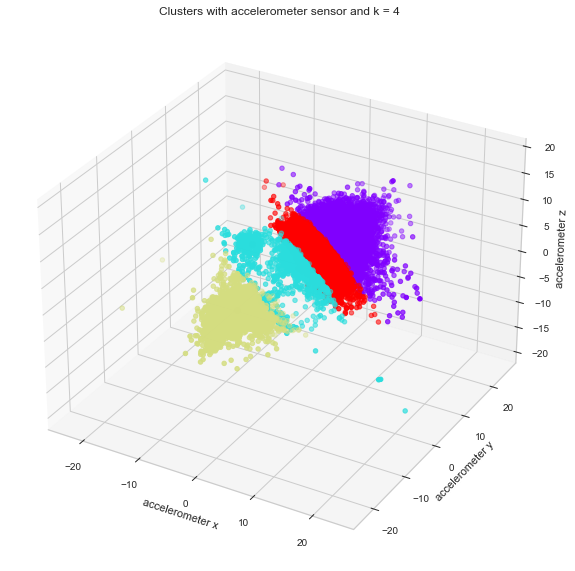

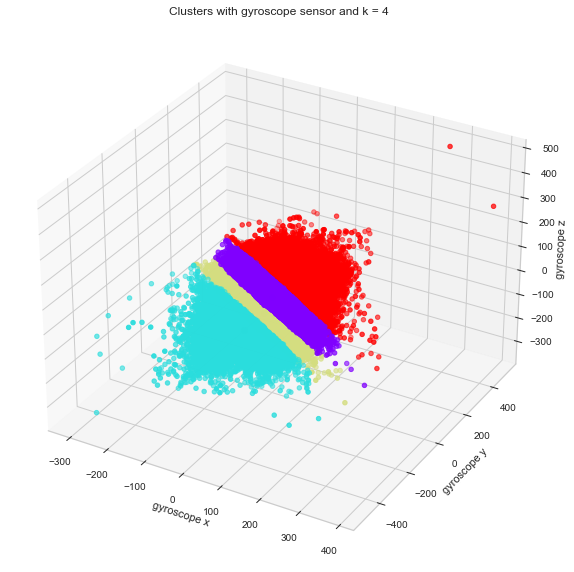

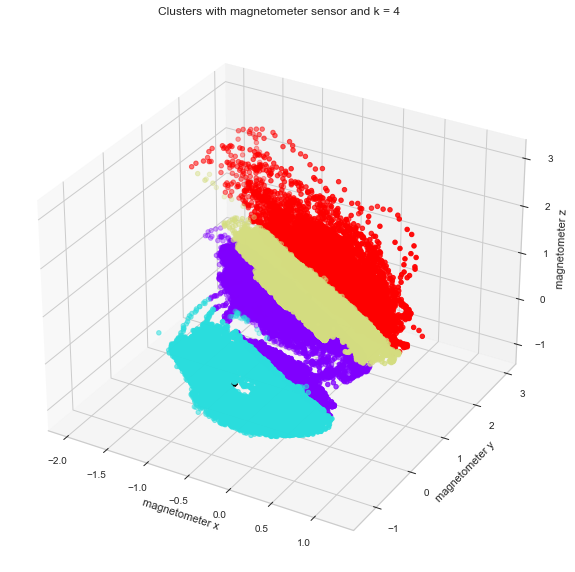

In [228]:
#https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib

import matplotlib.cm as cm

def plot_clusters(data, centroids, clusters, n_cluster, sensor):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes(projection='3d')
    ax.set_title("Clusters with " + sensor + ' sensor and k = ' + str(n_cluster))
    ax.set_xlabel(sensor + ' x')
    ax.set_ylabel(sensor + ' y')
    ax.set_zlabel(sensor + ' z')

    x = np.arange(centroids.shape[0])
    ys = [i+x+(i*x)**2 for i in range(centroids.shape[0])]

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    for i in range(n_cluster):
        ax.scatter3D(centroids[0][i],centroids[1][i],centroids[2][i], color = 'black', marker='x', linewidth=4)

    for i in range(n_cluster):
        points = data.iloc[clusters[i].index]
        ax.scatter3D(points[sensor + ' x'], points[sensor + ' y'], points[sensor + ' z'], color = colors[i], marker='o', linewidth = 1)

    

plot_clusters(dataFrame, centroids_acc_3, clusters_acc_3, n_clusters, 'accelerometer')
plot_clusters(dataFrame, centroids_gyr_3, clusters_gyr_3, n_clusters, 'gyroscope')
plot_clusters(dataFrame, centroids_mag_3, clusters_mag_3, n_clusters, 'magnetometer')

plot_clusters(dataFrame, centroids_acc_2, clusters_acc_2, 2, 'accelerometer')
plot_clusters(dataFrame, centroids_gyr_2, clusters_gyr_2, 2, 'gyroscope')
plot_clusters(dataFrame, centroids_mag_2, clusters_mag_2, 2, 'magnetometer')

plot_clusters(dataFrame, centroids_acc_4, clusters_acc_4, 4, 'accelerometer')
plot_clusters(dataFrame, centroids_gyr_4, clusters_gyr_4, 4, 'gyroscope')
plot_clusters(dataFrame, centroids_mag_4, clusters_mag_4, 4, 'magnetometer')


### 3.8. Outlier Injection 

d = (n0 / nr) * 100

Se dens < x -> sorteia (x-dens)% de not_out random -> cada ponto p <- m + s * k * (std+q)

In [12]:
def outlier_injection(data, x, k):
    data = data.copy()
    m = data.mean()
    std = data.std()
    
    out, not_out = z_score(data, k)

    d_out = (out.shape[0]/data.shape[0]) * 100

    print('Initial density: ' + str(d_out))
    print('Outliers count: ' + str(out.shape[0]))

    z = abs(max(out, default=0) - (m + k*std)) 

    if (d_out < x):
        nr_points = int(np.ceil(data.shape[0] * (x-d_out)/100))
        inj_point = not_out.sample(nr_points)

        for index, value in inj_point.items():
            q = np.random.uniform(0, z)
            s = random.choice([-1,1])
            data[index] = m + s * k * (std + q)

        out, not_out = z_score(data, k)
        d_out = (out.shape[0]/data.shape[0]) * 100
        
        print('Final density: ' + str(d_out))
        print('Outliers count: ' + str(out.shape[0]))

    return [data, out, not_out]


### 3.9. Modelo Linear

$\beta = (X^TX)^{-1} X^TY$

pinv -> pseudo-transposta = $(X^TX)^{-1} X$

In [4]:
def linear_model(data, p):
    return 0

### Exercicio 3.10.

### Leave One Out

In [38]:
def leave_one_out(window, p_test):
    size = len(window)-1
    erro = []
    for i in range(p_test, size):
        if( i == 0):
            array = np.array(list(window.iloc[:i]) + list(window.iloc[i+1:]))
            
            pred = linear_model(np.array(array), p_test)

            erro.append((window[i]-pred[size-i])**2)
            
    return erro
    
    

In [ ]:
def plot_3_10(sum_errors):
    
    p_range = range(1,15)
    
    x = sum_errors.index(min(sum_errors)) + 1
    y = min(sum_errors)
    plt.scatter(x, y, color="red", label="p = " + str(sum_errors.index(y) + 1))

    plt.bar(p_range,sum_errors)
    plt.plot(p_range,sum_errors)

    plt.title("Distribuição do erro em função de p")
    plt.xlabel("p")
    plt.ylabel("Somatorio do erro quadrático")

    plt.legend()
    plt.show()  

def ex3_10():
    window = 30
    p_range = range(1,15)
    p_max = 15
    mod_data = modulo(dataFrame)
    activity = mod_data.loc[mod_data['Label ID'] == 2]['Acc']
    inj_data, out, not_out = outlier_injection(activity,10,3)

    erros = []
    sum_errors = []

    for p in p_range:
        erros.append(leave_one_out(activity[:window],p))
    for e in erros:
        sum_errors.append(sum(e[:window-p_max]))

    
    plot_3_10(sum_errors)

#ex3_10()


### Exercício 4.1. 

In [ ]:
mod_data = modulo(dataFrame)

def normal_test(data):
    for id in range(1,17):
        print("-"*60)
        print('Activity: ' + activities[id-1])
        for s in sensors:
            activity = data.loc[data['Label ID'] == id, s]

            ks_stats, p_value = stats.kstest(activity, 'norm')

            print(s + ' Module\nKS statistic: ', ks_stats,'\tP value: ', p_value)

normal_test(mod_data)

------------------------------------------------------------
Activity: Stand
Acc Module
KS statistic:  0.9999999999434107 	P value:  0.0
Gyr Module
KS statistic:  0.6152749946720814 	P value:  0.0
Mag Module
KS statistic:  0.787095259688979 	P value:  0.0
------------------------------------------------------------
Activity: Sit
Acc Module
KS statistic:  0.9999999999999997 	P value:  0.0
Gyr Module
KS statistic:  0.5407134383978316 	P value:  0.0
Mag Module
KS statistic:  0.9066271737285365 	P value:  0.0
------------------------------------------------------------
Activity: Sit and Talk
Acc Module
KS statistic:  0.999999092516171 	P value:  0.0
Gyr Module
KS statistic:  0.5619170820609398 	P value:  0.0
Mag Module
KS statistic:  0.9048835615105808 	P value:  0.0
------------------------------------------------------------
Activity: Walk
Acc Module
KS statistic:  0.9999992914922885 	P value:  0.0
Gyr Module
KS statistic:  0.9760904419075495 	P value:  0.0
Mag Module
KS statistic:  0.79

### Exercício 4.2.

In [14]:
# SPECTRAL FEATURES

def mean(data):
    return data.mean(numeric_only=True)

def median(data):
    return data.median(numeric_only=True)

def std(data):
    return data.std(numeric_only=True)

def variance(data):
    return data.var(numeric_only=True)

def rms(data):
    aux = data.copy()
    aux.pop('Label Name')
    return np.sqrt(mean(aux.pow(2)))

def ad(data):
    aux = data.copy()
    aux.pop('Label Name')
    return mean(aux.diff())

def skew(data):
    return data.skew(numeric_only=True)

def kurtosis(data):
    return data.kurtosis(numeric_only=True)

def iqr(data):
    return data.quantile(0.75, numeric_only=True) - data.quantile(0.25, numeric_only=True)

def zcr(data):
    aux = data.copy()
    aux.pop('Label Name')
    return ((aux[:-1] * aux[1:]) < 0).sum()

def mcr(data):
    aux = data.copy()
    aux.pop('Label Name')
    return (((aux[:-1] - aux.mean()) * (aux[1:] - aux.mean())) < 0).sum()

def correlation(data, sensor):
    return data[['accelerometer x', 'accelerometer y',  'accelerometer z', 'gyroscope x', 'gyroscope y',  'gyroscope z', 'magnetometer x', 'magnetometer y',  'magnetometer z']].corr()

def spectral_entropy(x, sf, method='welch', nperseg=None, normalize=False):
    #https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html
    x = np.array(x)
    if method == 'fft':
        _, pxx = periodogram(x, sf)
    elif method == 'welch':
        _, pxx = welch(x, sf, nperseg=len(x) - 1)
    pxx_norm = np.divide(pxx, pxx.sum())   
    se = -np.multiply(pxx_norm, np.log2(pxx_norm)).sum()
    if normalize:
        se /= np.log2(pxx_norm.size)
    return se

def movement_intensity(data, sensor):
    return np.sqrt(((data[sensor + ' x'])**2) + ((data[sensor + ' y'])**2) + ((data[sensor + ' z'])**2))

def ai_mi(data, sensor):
    sum = np.sum(movement_intensity(data, sensor))
    return (1/len(data)) * sum

def vi_mi(data, sensor):
    sum = np.sum((movement_intensity(data, sensor) - ai_mi(data, sensor)) ** 2)
    return (1/len(data)) * sum

def sma(data, sensor):
    x = np.sum(np.abs(data[sensor + ' x']))
    y = np.sum(np.abs(data[sensor + ' y']))
    z = np.sum(np.abs(data[sensor + ' z']))
    return (1/len(data)) * (x + y + z)

def eva(data, sensor):
    mat = np.array([data[sensor + ' x'], data[sensor + ' y'], data[sensor + ' z']])
    cov = np.cov(mat, bias=True)
    eig_values, _ = np.linalg.eig(cov)
    eig_values = sorted(eig_values)
    return [eig_values[-1], eig_values[-2]]

def cagh(data, sensor):
    yz = np.sqrt((data[sensor + ' y'] ** 2) + (data[sensor + ' z'] ** 2))   #https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/
    x = data[sensor + ' x']
    return np.corrcoef(yz, x)[1][0]

def df(data, sensor, sf):
    freqs, pxx = periodogram(data, sf)

    fft_squared = pxx ** 2

    index_max = list(fft_squared).index(max(list(fft_squared)))

    return freqs[index_max]

def energy(data, sensor, sf):
    _, pxx = periodogram(data, sf)

    fft_squared = pxx ** 2

    return np.sum(fft_squared) / len(data)

def aae_are(x, y, z):
    return (x + y + z) / 3

def velocity(data, time, windowSize):
    return np.trapz(data, time) / windowSize

def avh(data, sensor, windowSize, T):
    time = np.arange(0, windowSize-T, T)
    vy = velocity(data[sensor + ' y'], time, windowSize)
    vz = velocity(data[sensor + ' z'], time, windowSize)
    euclideanNorm = np.sqrt((vy ** 2) + (vz ** 2))
    return euclideanNorm

def avg(data, sensor, windowSize, T):
    time = np.arange(0, windowSize-T, T)
    vx = velocity(data[sensor + ' x'], time, windowSize)
    return vx

def aratg(data, sensor, windowSize, T):
    sum = 0
    for i in range(len(data)-1):
        vi = [data.iloc[i][sensor + ' x'], data.iloc[i][sensor + ' y'], data.iloc[i][sensor + ' z']]
        vf = [data.iloc[i + 1][sensor + ' x'], data.iloc[i + 1][sensor + ' y'], data.iloc[i + 1][sensor + ' z']]

        cosO = np.dot(vi, vf) / (np.linalg.norm(vi)*np.linalg.norm(vf))
        O = np.arccos(np.minimum(1, cosO))

        sum += O
    
    return sum / windowSize



In [15]:
f = 51.2
T=1/f
windowT = 2

f_window = round(windowT/T)
step = round(f_window/2)

activities_by_window = {
    'Stand':[],
    'Sit':[],
    'Sit and Talk':[],
    'Walk':[],
    'Walk and Talk':[],
    'Climb Stair (up/down)':[],
    'Climb Stair (up/down) and talk':[],
    'Stand -> Sit':[],
    'Sit -> Stand':[],
    'Stand -> Sit and talk':[],
    'Sit -> Stand and talk':[],
    'Stand -> walk':[],
    'Walk -> stand':[],
    'Stand -> climb stairs (up/down)(and talk)':[],
    'Climb stairs (up/down) -> walk':[],
    'Climb stairs (up/down) and talk -> walk and talk':[],
}


for interval in range(0,len(dataFrame)-f_window,step):
    if dataFrame.iloc[interval]["Label Name"] == dataFrame.iloc[interval+f_window]["Label Name"]:
        activities_by_window[dataFrame.iloc[interval]["Label Name"]].append(dataFrame.iloc[interval:interval+f_window])

def columns(sensor):
    xyz = ['X', 'Y', 'Z']
    feature = ['Mean', 'Median', 'Std', 'Variance', 'RMS', 'AD', 'Skew', 'Kurtosis', 'IQR', 'ZCR', 'MCR', 'Spec Ent', 'DF', 'Energy']
    feature2 = ['X Y Corr', 'X Z Corr', 'Y Z Corr']
    
    if sensor == 'Acc':
         feature2 += ['AI', 'VI', 'SMA', 'EVA Vertical', 'EVA Horizontal', 'AVH', 'AVG', 'AAE', 'CAGH']

    elif sensor == 'Gyr':
        feature2 += ['ARE']#, 'ARATG']

    feature_col = ['Label'] + [sensor + ' ' + col + ' ' + f for col in xyz for f in feature] + [sensor + ' ' + f for f in feature2]

    return pd.DataFrame(columns = feature_col)

def extraction_feature(data, sensor, columns):
    if sensor == 'Acc':
        s = 'accelerometer' 
    elif sensor == 'Gyr':
        s = 'gyroscope' 
    else:
        s = 'magnetometer'

    for k,v in data.items():
        for valor in v:
            media = mean(valor)
            mediana = median(valor)
            desv = std(valor)
            var = variance(valor)
            root = rms(valor)
            ave = ad(valor)
            sk = skew(valor)
            kurt = kurtosis(valor)
            quartil = iqr(valor)
            zero = zcr(valor)
            meancr = mcr(valor)  
            corr = correlation(valor, s)    
            specx = spectral_entropy(valor[s + ' x'], f)
            specy = spectral_entropy(valor[s + ' y'], f)
            specz = spectral_entropy(valor[s + ' z'], f)  
            dfx = df(valor[s + ' x'], s, f)
            dfy = df(valor[s + ' y'], s, f)
            dfz = df(valor[s + ' z'], s, f)
            energyx = energy(valor[s + ' x'], s, f)
            energyy = energy(valor[s + ' y'], s, f)
            energyz = energy(valor[s + ' z'], s, f)

            if(sensor == 'Acc'):
                ai_miv = ai_mi(valor, s)    
                vi_miv = vi_mi(valor, s)  
                smav = sma(valor, s)
                [eva_v, eva_h] = eva(valor, s)
                caghv = cagh(valor, s)
                aaev = aae_are(energyx, energyy, energyz)
                avhv = avh(valor, s, windowT, T)
                avgv = avg(valor, s, windowT, T)

                new_columns = pd.DataFrame({
                    'Label': k,
                    sensor + ' X Mean': [media[s + ' x']], sensor + ' Y Mean': [media[s + ' y']], sensor + ' Z Mean': [media[s + ' z']],
                    sensor + ' X Median': [mediana[s + ' x']], sensor + ' Y Median': [mediana[s + ' y']], sensor + ' Z Median': [mediana[s + ' z']],
                    sensor + ' X Std': [desv[s + ' x']], sensor + ' Y Std': [desv[s + ' y']], sensor + ' Z Std': [desv[s + ' z']],
                    sensor + ' X Variance': [var[s + ' x']], sensor + ' Y Variance': [var[s + ' y']], sensor + ' Z Variance': [var[s + ' z']],
                    sensor + ' X RMS': [root[s + ' x']], sensor + ' Y RMS': [root[s + ' y']], sensor + ' Z RMS': [root[s + ' z']],
                    sensor + ' X AD': [ave[s + ' x']], sensor + ' Y AD': [ave[s + ' y']], sensor + ' Z AD': [ave[s + ' z']],
                    sensor + ' X Skew': [sk[s + ' x']], sensor + ' Y Skew': [sk[s + ' y']], sensor + ' Z Skew': [sk[s + ' z']],
                    sensor + ' X Kurtosis': [kurt[s + ' x']], sensor + ' Y Kurtosis': [kurt[s + ' y']], sensor + ' Z Kurtosis': [kurt[s + ' z']],
                    sensor + ' X IQR': [quartil[s + ' x']], sensor + ' Y IQR': [quartil[s + ' y']], sensor + ' Z IQR': [quartil[s + ' z']],
                    sensor + ' X ZCR': [zero[s + ' x']], sensor + ' Y ZCR': [zero[s + ' y']], sensor + ' Z ZCR': [zero[s + ' z']],
                    sensor + ' X MCR': [meancr[s + ' x']], sensor + ' Y MCR': [meancr[s + ' y']], sensor + ' Z MCR': [meancr[s + ' z']],
                    sensor + ' X Y Corr': [corr.loc[s + ' x', s + ' y']], sensor + ' X Z Corr': [corr.loc[s + ' x', s + ' z']], sensor + ' Y Z Corr': [corr.loc[s + ' y', s + ' z']], sensor + ' X gyr X Corr': [corr.loc[s + ' x', 'gyroscope x']], sensor + ' X gyr Y Corr': [corr.loc[s + ' x', 'gyroscope y']], sensor + ' X gyr Z Corr': [corr.loc[s + ' x', 'gyroscope z']], sensor + ' Y gyr X Corr': [corr.loc[s + ' y', 'gyroscope x']], sensor + ' Y gyr Y Corr': [corr.loc[s + ' y', 'gyroscope y']], sensor + ' Y gyr Z Corr': [corr.loc[s + ' y', 'gyroscope z']], sensor + ' Z gyr X Corr': [corr.loc[s + ' z', 'gyroscope x']], sensor + ' Z gyr Y Corr': [corr.loc[s + ' z', 'gyroscope y']], sensor + ' Z gyr Z Corr': [corr.loc[s + ' z', 'gyroscope z']], sensor + ' X mag X Corr': [corr.loc[s + ' x', 'magnetometer x']], sensor + ' X mag Y Corr': [corr.loc[s + ' x', 'magnetometer y']], sensor + ' X mag Z Corr': [corr.loc[s + ' x', 'magnetometer z']], sensor + ' Y mag X Corr': [corr.loc[s + ' y', 'magnetometer x']], sensor + ' Y mag Y Corr': [corr.loc[s + ' y', 'magnetometer y']], sensor + ' Y mag Z Corr': [corr.loc[s + ' y', 'magnetometer z']], sensor + ' Z mag X Corr': [corr.loc[s + ' z', 'magnetometer x']], sensor + ' Z mag Y Corr': [corr.loc[s + ' z', 'magnetometer y']], sensor + ' Z mag Z Corr': [corr.loc[s + ' z', 'magnetometer z']],
                    sensor + ' X Spec Ent': [specx], sensor + ' Y Spec Ent': [specy], sensor + ' Z Spec Ent': [specz],
                    sensor + ' AI': [ai_miv], sensor + ' VI': [vi_miv],
                    sensor + ' SMA': [smav],
                    sensor + ' EVA Vertical': [eva_v], sensor + ' EVA Horizontal': [eva_h],
                    sensor + ' CAGH': [caghv],
                    sensor + ' X DF': [dfx], sensor + ' Y DF': [dfy], sensor + ' Z DF': [dfz],
                    sensor + ' X Energy': [energyx], sensor + ' Y Energy': [energyy], sensor + ' Z Energy': [energyz],
                    sensor + ' AAE': [aaev],
                    sensor + ' AVH': [avhv],
                    sensor + ' AVG': [avgv]
            })

            elif(sensor == 'Gyr'):
                arev = aae_are(energyx, energyy, energyz)
                #aratgv = aratg(valor, s, windowT, T)

                new_columns = pd.DataFrame({
                    'Label': k,
                    sensor + ' X Mean': [media[s + ' x']], sensor + ' Y Mean': [media[s + ' y']], sensor + ' Z Mean': [media[s + ' z']],
                    sensor + ' X Median': [mediana[s + ' x']], sensor + ' Y Median': [mediana[s + ' y']], sensor + ' Z Median': [mediana[s + ' z']],
                    sensor + ' X Std': [desv[s + ' x']], sensor + ' Y Std': [desv[s + ' y']], sensor + ' Z Std': [desv[s + ' z']],
                    sensor + ' X Variance': [var[s + ' x']], sensor + ' Y Variance': [var[s + ' y']], sensor + ' Z Variance': [var[s + ' z']],
                    sensor + ' X RMS': [root[s + ' x']], sensor + ' Y RMS': [root[s + ' y']], sensor + ' Z RMS': [root[s + ' z']],
                    sensor + ' X AD': [ave[s + ' x']], sensor + ' Y AD': [ave[s + ' y']], sensor + ' Z AD': [ave[s + ' z']],
                    sensor + ' X Skew': [sk[s + ' x']], sensor + ' Y Skew': [sk[s + ' y']], sensor + ' Z Skew': [sk[s + ' z']],
                    sensor + ' X Kurtosis': [kurt[s + ' x']], sensor + ' Y Kurtosis': [kurt[s + ' y']], sensor + ' Z Kurtosis': [kurt[s + ' z']],
                    sensor + ' X IQR': [quartil[s + ' x']], sensor + ' Y IQR': [quartil[s + ' y']], sensor + ' Z IQR': [quartil[s + ' z']],
                    sensor + ' X ZCR': [zero[s + ' x']], sensor + ' Y ZCR': [zero[s + ' y']], sensor + ' Z ZCR': [zero[s + ' z']],
                    sensor + ' X MCR': [meancr[s + ' x']], sensor + ' Y MCR': [meancr[s + ' y']], sensor + ' Z MCR': [meancr[s + ' z']],
                    sensor + ' X Y Corr': [corr.loc[s + ' x', s + ' y']], sensor + ' X Z Corr': [corr.loc[s + ' x', s + ' z']], sensor + ' Y Z Corr': [corr.loc[s + ' y', s + ' z']], sensor + ' X acc X Corr': [corr.loc[s + ' x', 'accelerometer x']], sensor + ' X acc Y Corr': [corr.loc[s + ' x', 'accelerometer y']], sensor + ' X acc Z Corr': [corr.loc[s + ' x', 'accelerometer z']], sensor + ' Y acc X Corr': [corr.loc[s + ' y', 'accelerometer x']], sensor + ' Y acc Y Corr': [corr.loc[s + ' y', 'accelerometer y']], sensor + ' Y acc Z Corr': [corr.loc[s + ' y', 'accelerometer z']], sensor + ' Z acc X Corr': [corr.loc[s + ' z', 'accelerometer x']], sensor + ' Z acc Y Corr': [corr.loc[s + ' z', 'accelerometer y']], sensor + ' Z acc Z Corr': [corr.loc[s + ' z', 'accelerometer z']], sensor + ' X mag X Corr': [corr.loc[s + ' x', 'magnetometer x']], sensor + ' X mag Y Corr': [corr.loc[s + ' x', 'magnetometer y']], sensor + ' X mag Z Corr': [corr.loc[s + ' x', 'magnetometer z']], sensor + ' Y mag X Corr': [corr.loc[s + ' y', 'magnetometer x']], sensor + ' Y mag Y Corr': [corr.loc[s + ' y', 'magnetometer y']], sensor + ' Y mag Z Corr': [corr.loc[s + ' y', 'magnetometer z']], sensor + ' Z mag X Corr': [corr.loc[s + ' z', 'magnetometer x']], sensor + ' Z mag Y Corr': [corr.loc[s + ' z', 'magnetometer y']], sensor + ' Z mag Z Corr': [corr.loc[s + ' z', 'magnetometer z']],
                    sensor + ' X Spec Ent': [specx], sensor + ' Y Spec Ent': [specy], sensor + ' Z Spec Ent': [specz],
                    sensor + ' X DF': [dfx], sensor + ' Y DF': [dfy], sensor + ' Z DF': [dfz],
                    sensor + ' X Energy': [energyx], sensor + ' Y Energy': [energyy], sensor + ' Z Energy': [energyz],
                    sensor + ' ARE': [arev]
                    #, sensor + ' ARATG': [aratgv]
                })

            else:
                new_columns = pd.DataFrame({
                    'Label': k,
                    sensor + ' X Mean': [media[s + ' x']], sensor + ' Y Mean': [media[s + ' y']], sensor + ' Z Mean': [media[s + ' z']],
                    sensor + ' X Median': [mediana[s + ' x']], sensor + ' Y Median': [mediana[s + ' y']], sensor + ' Z Median': [mediana[s + ' z']],
                    sensor + ' X Std': [desv[s + ' x']], sensor + ' Y Std': [desv[s + ' y']], sensor + ' Z Std': [desv[s + ' z']],
                    sensor + ' X Variance': [var[s + ' x']], sensor + ' Y Variance': [var[s + ' y']], sensor + ' Z Variance': [var[s + ' z']],
                    sensor + ' X RMS': [root[s + ' x']], sensor + ' Y RMS': [root[s + ' y']], sensor + ' Z RMS': [root[s + ' z']],
                    sensor + ' X AD': [ave[s + ' x']], sensor + ' Y AD': [ave[s + ' y']], sensor + ' Z AD': [ave[s + ' z']],
                    sensor + ' X Skew': [sk[s + ' x']], sensor + ' Y Skew': [sk[s + ' y']], sensor + ' Z Skew': [sk[s + ' z']],
                    sensor + ' X Kurtosis': [kurt[s + ' x']], sensor + ' Y Kurtosis': [kurt[s + ' y']], sensor + ' Z Kurtosis': [kurt[s + ' z']],
                    sensor + ' X IQR': [quartil[s + ' x']], sensor + ' Y IQR': [quartil[s + ' y']], sensor + ' Z IQR': [quartil[s + ' z']],
                    sensor + ' X ZCR': [zero[s + ' x']], sensor + ' Y ZCR': [zero[s + ' y']], sensor + ' Z ZCR': [zero[s + ' z']],
                    sensor + ' X MCR': [meancr[s + ' x']], sensor + ' Y MCR': [meancr[s + ' y']], sensor + ' Z MCR': [meancr[s + ' z']],
                    sensor + ' X Y Corr': [corr.loc[s + ' x', s + ' y']], sensor + ' X Z Corr': [corr.loc[s + ' x', s + ' z']], sensor + ' Y Z Corr': [corr.loc[s + ' y', s + ' z']], sensor + ' X acc X Corr': [corr.loc[s + ' x', 'accelerometer x']], sensor + ' X acc Y Corr': [corr.loc[s + ' x', 'accelerometer y']], sensor + ' X acc Z Corr': [corr.loc[s + ' x', 'accelerometer z']], sensor + ' Y acc X Corr': [corr.loc[s + ' y', 'accelerometer x']], sensor + ' Y acc Y Corr': [corr.loc[s + ' y', 'accelerometer y']], sensor + ' Y acc Z Corr': [corr.loc[s + ' y', 'accelerometer z']], sensor + ' Z acc X Corr': [corr.loc[s + ' z', 'accelerometer x']], sensor + ' Z acc Y Corr': [corr.loc[s + ' z', 'accelerometer y']], sensor + ' Z acc Z Corr': [corr.loc[s + ' z', 'accelerometer z']], sensor + ' X gyr X Corr': [corr.loc[s + ' x', 'gyroscope x']], sensor + ' X gyr Y Corr': [corr.loc[s + ' x', 'gyroscope y']], sensor + ' X gyr Z Corr': [corr.loc[s + ' x', 'gyroscope z']], sensor + ' Y gyr X Corr': [corr.loc[s + ' y', 'gyroscope x']], sensor + ' Y gyr Y Corr': [corr.loc[s + ' y', 'gyroscope y']], sensor + ' Y gyr Z Corr': [corr.loc[s + ' y', 'gyroscope z']], sensor + ' Z gyr X Corr': [corr.loc[s + ' z', 'gyroscope x']], sensor + ' Z gyr Y Corr': [corr.loc[s + ' z', 'gyroscope y']], sensor + ' Z gyr Z Corr': [corr.loc[s + ' z', 'gyroscope z']],
                    sensor + ' X Spec Ent': [specx], sensor + ' Y Spec Ent': [specy], sensor + ' Z Spec Ent': [specz],
                    sensor + ' X DF': [dfx], sensor + ' Y DF': [dfy], sensor + ' Z DF': [dfz],
                    sensor + ' X Energy': [energyx], sensor + ' Y Energy': [energyy], sensor + ' Z Energy': [energyz]
            })

            columns = pd.concat([columns, new_columns], ignore_index=True)
  
    return columns


result = columns("Acc")
result_acc = extraction_feature(activities_by_window, "Acc", result)
result_acc.to_csv('Acc_features.csv', encoding='utf-8')
print('ACC DONE')


result = columns("Gyr")
result_gyr = extraction_feature(activities_by_window, "Gyr", result)
result_gyr.to_csv('Gyr_features.csv', encoding='utf-8')
print('GYR DONE')


result = columns("Mag")
result_mag = extraction_feature(activities_by_window, "Mag", result)
result_mag.to_csv('Mag_features.csv', encoding='utf-8')
print('MAG DONE')



ACC DONE
GYR DONE
MAG DONE


### 4.3. PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [16]:
def normalize(data):
    #https://en.wikipedia.org/wiki/Normalization_(statistics)
    for col in data.columns:
        if (col != "Label"):
            m = data[col].mean()
            std = data[col].std()
            if std != 0: 
                data[col] = (data[col]- m ) / std 
            else: 
                data[col] = (data[col]- m )
    return data

data_norm_acc = normalize(result_acc).dropna(axis=1, how='all')

data_norm_gyr = normalize(result_gyr).dropna(axis=1, how='all')

data_norm_mag = normalize(result_mag).dropna(axis=1, how='all')


In [17]:
def standard(data):
    features = data.drop("Label", axis = 1)
    target = data["Label"]

    return [features, target]

[features_acc, target_acc] = standard(data_norm_acc)
[features_gyr, target_gyr] = standard(data_norm_gyr)
[features_mag, target_mag] = standard(data_norm_mag)

display(features_gyr)
np.savetxt('data.csv', features_gyr, delimiter=',')

,Gyr X Mean,Gyr X Median,Gyr X Std,Gyr X Variance,Gyr X RMS,Gyr X AD,Gyr X Skew,Gyr X Kurtosis,Gyr X IQR,Gyr X ZCR,...,Gyr Z acc Z Corr,Gyr X mag X Corr,Gyr X mag Y Corr,Gyr X mag Z Corr,Gyr Y mag X Corr,Gyr Y mag Y Corr,Gyr Y mag Z Corr,Gyr Z mag X Corr,Gyr Z mag Y Corr,Gyr Z mag Z Corr
0,-0.062993,-0.064207,-0.887524,-0.648946,-0.897407,-0.052906,-2.356386,0.571209,-0.879987,0.0,...,1.300203,1.079364,1.309063,-2.277556,-0.112099,-0.583300,0.936545,-1.259778,-1.679140,2.429803
1,-0.055129,-0.077710,-0.875751,-0.648136,-0.887990,0.048658,-1.466668,0.083284,-0.850322,0.0,...,-0.256701,-1.779828,-0.847748,1.721695,-0.729528,-1.138820,1.020198,1.715669,0.356047,-1.038054
2,0.170018,0.089805,-0.883049,-0.648649,-0.859347,0.041567,0.949237,0.356635,-0.875329,0.0,...,1.425150,-1.489127,1.767522,1.645360,-0.803589,1.012360,0.887268,1.694734,-2.433696,-1.675901
3,0.143951,0.047587,-0.876099,-0.648161,-0.863607,-0.051792,1.428733,0.028793,-0.848930,0.0,...,-0.326881,2.046102,-1.173178,-1.912688,1.462406,-0.834811,-1.291536,-2.293367,1.036207,1.853878
4,0.013710,-0.053280,-0.910941,-0.650285,-0.922859,0.067600,1.500294,0.359996,-0.881869,0.0,...,1.795372,-0.090290,-0.460205,0.766087,-0.332783,-0.238977,1.075190,-0.512847,-0.394615,0.524540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,0.291493,0.083946,0.024603,-0.314519,-0.040027,0.385163,0.501561,-0.291597,0.056856,0.0,...,1.137437,0.443756,0.249842,0.914672,0.940910,1.534721,-0.309466,-0.296726,0.205070,0.089360
14484,-0.542840,-0.578807,-0.210145,-0.453188,-0.218169,0.519760,-0.317342,-0.031991,-0.354793,0.0,...,1.758203,-2.056576,-0.311757,2.558287,0.712516,-1.921239,-0.646808,0.757091,-2.751152,-0.514542
14485,-0.915627,-0.800301,0.243128,-0.152670,0.246808,0.538621,-0.657512,-0.216433,0.293718,0.0,...,0.194862,-1.471961,0.243215,1.479516,-0.171765,0.328294,1.675308,0.082471,0.321259,1.469082
14486,0.626108,0.612396,1.396794,1.225443,1.248775,-0.050753,-0.653319,-0.296814,1.210720,0.0,...,-0.974820,0.715016,1.137330,0.047647,1.610799,1.675299,-2.085592,1.124464,2.692922,-1.651307


In [18]:
from sklearn.decomposition import PCA

def pca(data,target, n_components, sensor): 

    ppca = PCA(n_components)    
    principalComponents = ppca.fit_transform(data) 

    print("--------- " + sensor + " ----------")
    
    print("Components number", ppca.n_components_)
    print("Importance of each principal component", ppca.explained_variance_ratio_)

    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i+1) for i in range(principalComponents.shape[1])])
    finalDf = pd.concat([principalDf, target], axis = 1)

    return finalDf

pca_acc = pca(features_acc,target_acc, 0.75, "Acc")
pca_gyr = pca(features_gyr, target_gyr, 0.75, "Gyr")
pca_mag = pca(features_mag, target_mag, 0.75, "Mag")

display(pca_acc)
display(pca_gyr)
display(pca_mag)

--------- Acc ----------
Components number 20
Importance of each principal component [0.21538213 0.08643804 0.06352815 0.04601708 0.03642761 0.0318248
 0.02928896 0.02880075 0.02519737 0.02415691 0.02160026 0.01973836
 0.01942582 0.01815215 0.01654879 0.01608343 0.01597987 0.01570157
 0.01529745 0.01442517]
--------- Gyr ----------
Components number 18
Importance of each principal component [0.2303104  0.09675721 0.04467626 0.04041225 0.03479647 0.03314732
 0.02843587 0.02767759 0.02680439 0.02548233 0.02326276 0.0227552
 0.02193984 0.021107   0.02035558 0.01916802 0.01869571 0.01785359]
--------- Mag ----------
Components number 18
Importance of each principal component [0.22092587 0.07191832 0.0532585  0.04792973 0.04229237 0.03457179
 0.03130258 0.03036545 0.02827572 0.02633209 0.02520031 0.02298978
 0.02249379 0.02071594 0.01946483 0.01872926 0.01749097 0.01724788]


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Label
0,-2.747085,-0.701288,-0.538438,1.891386,1.355871,2.099470,-0.199280,-1.782994,-0.505887,-1.192288,...,-0.743475,1.804268,-1.819319,-1.795354,-1.139323,0.039596,-0.495176,-0.551833,-1.031276,Stand
1,-1.564722,-0.925373,-1.839773,2.961920,-0.033878,2.768722,-0.720776,1.127989,-2.249778,-1.266386,...,-2.133607,1.611786,-2.815736,-1.054104,-0.507691,0.263356,1.165361,-0.560868,0.993589,Stand
2,-2.379076,-0.233945,-1.146053,3.360412,0.718098,-0.079605,-1.564844,-0.505708,4.116052,-3.361712,...,1.582216,0.329916,2.835231,0.757053,-0.495839,0.486160,-4.444731,1.977934,-1.824680,Stand
3,-1.934387,-1.169043,-1.507253,3.171308,1.542013,1.071031,-3.053621,0.010523,2.656313,-2.247553,...,-1.289373,-0.303636,1.752281,0.588630,0.450916,0.126496,-1.897053,0.009061,-0.573890,Stand
4,-2.891175,-1.844921,-0.183538,0.833590,1.459644,2.674382,1.207870,-2.450990,0.113133,0.311815,...,-0.983110,-0.390810,-0.416629,1.325803,0.683639,-0.203788,0.520771,-0.012916,1.301861,Stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,1.585239,-4.446735,4.603062,1.635274,0.755772,-3.574499,0.744966,-0.090938,-0.824326,-1.037432,...,0.416722,0.677016,0.293082,-0.241089,0.624773,1.145592,0.076926,1.987554,-2.005524,Climb stairs (up/down) and talk -> walk and talk
14484,2.098804,1.970334,0.246955,1.936677,0.286175,-0.901941,-2.276509,-2.088555,2.080329,-0.778245,...,0.825983,-1.381867,2.058898,-0.868953,-1.645598,-1.421919,-2.884985,2.922837,0.271488,Climb stairs (up/down) and talk -> walk and talk
14485,3.656965,0.695567,1.319878,-0.496841,1.170891,0.254220,-0.015555,0.335093,-0.158827,0.123923,...,-1.547228,0.547697,-0.687888,0.165271,0.129293,0.037323,-0.368897,-2.743096,0.621170,Climb stairs (up/down) and talk -> walk and talk
14486,1.659903,-1.112185,-0.338697,0.179690,-3.084294,0.490867,0.103733,1.482696,0.926691,1.845496,...,0.777712,-0.807064,0.941952,0.624154,0.158985,1.980876,0.292142,-0.345730,-0.248681,Climb stairs (up/down) and talk -> walk and talk


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Label
0,-2.433452,0.441336,-1.801644,0.073315,-0.316529,0.466647,2.266056,0.081527,1.436327,-0.037920,1.665769,0.970519,3.308809,-2.450694,0.754289,2.123973,0.563759,0.154442,Stand
1,-2.339509,0.313528,-1.982310,1.588326,0.261117,-0.089047,-0.274547,0.975155,2.814347,0.820464,-0.855548,-0.276444,-1.129161,0.627659,0.337667,0.941434,-0.590882,-2.630162,Stand
2,-2.775950,-0.326958,-0.456874,-0.305528,0.943778,-1.635336,1.344586,-2.033088,-1.227187,0.388034,1.141400,2.846269,-2.820143,1.691932,-2.320582,1.457201,-0.478106,0.061530,Stand
3,-2.316305,-0.559743,-1.781413,-0.033085,-1.278247,-0.162092,0.730377,1.997378,-1.724502,1.406842,2.983138,-0.510621,0.094852,-0.626590,4.085617,-1.350976,0.275082,0.233313,Stand
4,-4.280193,0.347538,0.869304,0.543724,-0.464006,-0.464811,1.084915,-0.155786,0.432821,1.106219,1.391200,-0.297245,-1.273495,0.272837,1.600844,0.522800,-0.601192,-0.140241,Stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,-0.278671,-1.683365,0.345849,-0.491689,-0.465584,-0.400523,0.363751,-0.772860,-1.266681,-0.510560,-0.437911,1.535259,-0.688873,-0.147186,-1.044137,-0.987716,0.031943,0.787001,Climb stairs (up/down) and talk -> walk and talk
14484,0.878437,2.904119,-1.148618,1.936892,-0.301152,-0.259554,1.364574,-0.959469,-0.347481,-0.544057,-1.239884,0.608416,-0.790569,2.356233,-3.168801,1.193305,-0.742668,0.058688,Climb stairs (up/down) and talk -> walk and talk
14485,0.727203,1.886016,-0.248138,-0.014103,-1.114267,-1.115259,0.652165,-1.315747,1.613300,1.509632,-0.495450,-0.390005,0.518863,-0.717640,-0.235811,-1.195188,-0.718400,-1.013640,Climb stairs (up/down) and talk -> walk and talk
14486,2.265162,-3.483083,-0.438539,-0.922326,1.985295,-0.978451,-3.139037,1.823741,-0.442407,-0.012632,-0.818335,0.932996,0.744778,0.551757,-0.928998,-1.215627,-0.744448,1.389924,Climb stairs (up/down) and talk -> walk and talk


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Label
0,-1.901873,-0.056567,-0.833989,0.214427,-0.349545,0.405764,0.680905,1.186683,0.485054,1.010251,1.372380,1.614159,0.128468,0.246398,0.468858,0.833774,-2.735401,-1.059976,Stand
1,-0.951465,0.245352,0.458483,1.632459,1.094439,1.003161,-0.689748,1.765281,2.026035,-2.052033,-4.505725,0.954104,-0.195119,-1.290626,0.281119,-0.169939,-2.256396,-2.254476,Stand
2,-1.209557,2.001957,-1.667818,-0.125701,-2.278476,-0.831570,-0.431556,1.136428,-0.559806,3.824147,-1.599881,1.333691,-1.338929,-0.259262,3.975500,0.352924,2.914174,-0.111012,Stand
3,-1.297089,1.623885,-1.883680,0.403037,-0.832255,-1.801515,-1.814077,0.626774,-0.999673,6.601484,1.351849,1.102516,-2.020290,0.486803,0.169890,0.366928,1.367028,0.869726,Stand
4,-3.189496,-0.005726,0.232660,0.639282,-0.501390,0.455914,0.542617,1.556468,1.169838,0.561239,-0.270334,0.608507,0.325244,-0.640430,0.543890,0.071537,-0.467049,0.139986,Stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,0.962909,-1.022346,-0.324850,-1.825331,-1.829491,1.688346,-1.632386,-3.922936,-0.277886,0.135838,-1.002586,0.874621,-0.243656,-1.066544,0.160860,-0.508236,0.341137,-0.436644,Climb stairs (up/down) and talk -> walk and talk
14484,1.941564,-1.569194,-0.518023,2.451381,-3.109443,-0.642230,0.801821,0.645486,-0.804913,0.625252,-0.959130,0.084439,0.867468,1.099092,1.246340,0.851898,1.590774,1.575084,Climb stairs (up/down) and talk -> walk and talk
14485,2.418761,-2.566594,0.571148,1.451436,0.413129,-0.266328,1.280863,-0.303864,0.560353,-0.536454,-1.092468,2.493892,1.316285,-0.440079,-0.241625,-0.286437,0.242291,-0.190733,Climb stairs (up/down) and talk -> walk and talk
14486,5.369879,-1.713228,2.029558,-1.926731,3.074764,-0.961000,-1.803605,-0.142649,-0.445453,-0.067927,-0.345276,-0.977372,-3.091196,0.085428,0.241284,1.864384,-0.588648,-0.362611,Climb stairs (up/down) and talk -> walk and talk


### 4.4.1. Como se poderia obter as features relativas a esta compressão?
Comparando o número de linhas do dataframe que contém a totalidade das features com o da compressão com PCA, percebemos que esse número é igual. Com isto, fica claro que o PCA apenas reduz o número de features (colunas), mantendo a quantidade e a ordem das janelas (linhas). Posto isto, como o índice das linhas se mantém, as componentes principais do dataframe pós PCA da linha 24 dizem respeito às features do dataframe correspondente na linha 24.
<br><br>
O exemplo seguinte exemplica o explicado acima: <br>

In [19]:
print("-------------- Principal Components --------------")
display(pd.DataFrame(pca_acc.iloc[24]))
print("-------------- Features --------------")
display(pd.DataFrame(result_acc.iloc[24]))

-------------- Principal Components --------------


,24
Principal Component 1,-2.696288
Principal Component 2,-2.120885
Principal Component 3,-0.687436
Principal Component 4,0.457857
Principal Component 5,0.675584
Principal Component 6,1.712337
Principal Component 7,1.305771
Principal Component 8,0.397083
Principal Component 9,0.105676
Principal Component 10,0.717961


-------------- Features --------------


,24
Label,Stand
Acc X Mean,-0.370584
Acc X Median,-0.363771
Acc X Std,-0.917249
Acc X Variance,-0.498335
...,...
Acc Y mag Y Corr,-0.354526
Acc Y mag Z Corr,0.355131
Acc Z mag X Corr,-0.43582
Acc Z mag Y Corr,-0.32362


### 4.4.2. Vantagens e desvantagens desta abordagem

- **Vantagens:**
    - Redução do número de colunas de um dataframe, ou seja, redução da memória necessária (compressão)
    - Diminuição do tempo necessário de execução do código
    - Mais facilidade na visualização e interpretação dos dados visto que a dimensionalidade é reduzida
- **Desvantagens:**
    - Perda de informação